In [151]:
import os
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
import seaborn as sns

# Jupyter stuff
from tqdm.notebook import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline

# path with scPerturb data (replace accordingly)
data_path = '/fast/work/users/peidlis_c/data/perturbation_resource_paper/'
# temp path
SDIR = '/fast/scratch/users/peidlis_c/perturbation_resource_paper/'
# output from snakemake (tables)
table_path = '/fast/work/users/peidlis_c/projects/perturbation_resource_paper/single_cell_perturbation_data/code/notebooks/data_analysis/analysis_screens/tables/'
# path for figures
figure_path = '../figures/'
# path for supplemental figures and tables
supp_path = '../supplement/'

/tmp/ipykernel_4069682/2186361752.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Load Data

In [134]:
# get indecs of dataset
h5_files = {}
for path, subdirs, files in os.walk(data_path):
    for name in files:
        if '.h5' in name: h5_files[name.split('.h5')[0]] = os.path.join(path, name)
del h5_files['exampledataset']
del h5_files['NormanWeissman2019_raw']
# exclude protein datasets
del h5_files['PapalexiSatija2021_eccite_arrayed_protein']
del h5_files['PapalexiSatija2021_eccite_protein']
del h5_files['FrangiehIzar2021_protein']
# exclude scATAC-seq datasets
del h5_files['gene_scores']
del h5_files['peak_bc']
del h5_files['ChromVar']
del h5_files['LSI_embedding']
del h5_files['markerpeak_target']
# buggy?
# del h5_files['XieHon2017']

datasets = list(h5_files.keys())
print(len(datasets))

35


In [135]:
# capture obs and vars in a dict, indices as keys
obses = {}
vares = {}
for name, path in tqdm(h5_files.items(), leave=False):
    obses[name] = pd.read_csv(os.path.dirname(path)+'/obs.csv')
    vares[name] = pd.read_csv(os.path.dirname(path)+'/var.csv')

  0%|          | 0/35 [00:00<?, ?it/s]

/tmp/ipykernel_4069682/1035502437.py:5: DtypeWarning: Columns (6,15,16,28) have mixed types. Specify dtype option on import or set low_memory=False.
  obses[name] = pd.read_csv(os.path.dirname(path)+'/obs.csv')
/tmp/ipykernel_4069682/1035502437.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  obses[name] = pd.read_csv(os.path.dirname(path)+'/obs.csv')


In [136]:
# This is the excel table on the datasets
metadata = pd.read_excel('../metadata/scperturb_dataset_info_180822.xlsx', index_col=0)
metadata['dataset_id'] = [i if pd.isna(x) else f'{i}_{x}' for i, x in zip(metadata.index, metadata.dataset_index)]
metadata = metadata.set_index('dataset_id')
metadata.head()

,dataset_index,Title,doi/url,First Author,Organisms,Modality = Data type,Method,Tissues,Number of perturbations (incl. unperturbed),Perturbation,disease,celltype,tissue type,Cancer,multiple time points?,multiple concentrations?,combined perturbations?,Date of Submission,Year,Mini-Abstract (loosely summarized original Abstract)
dataset_id,,,,,,,,,,,,,,,,,,,,
AdamsonWeissman2016_GSM2406675_10X001,GSM2406675_10X001,A multiplexed single-cell CRISPR screening pla...,https://doi.org/10.1016/j.cell.2016.11.048,Britt Adamson,Homo sapiens,RNA,Perturb-seq,K562,10,CRISPR-cas9,chronic myelogenous leukemia,lymphoblasts,cell_line,y,n,n,y,2019-10-01,2019,Perturb-seq is applied to dissect the mammalia...
AdamsonWeissman2016_GSM2406677_10X005,GSM2406677_10X005,A multiplexed single-cell CRISPR screening pla...,https://doi.org/10.1016/j.cell.2016.11.048,Britt Adamson,Homo sapiens,RNA,Perturb-seq,K562,21,CRISPR-cas9,chronic myelogenous leukemia,lymphoblasts,cell_line,y,n,n,y,2019-10-01,2019,Perturb-seq is applied to dissect the mammalia...
AdamsonWeissman2016_GSM2406681_10X010,GSM2406681_10X010,A multiplexed single-cell CRISPR screening pla...,https://doi.org/10.1016/j.cell.2016.11.048,Britt Adamson,Homo sapiens,RNA,Perturb-seq,K562,115,CRISPR-cas9,chronic myelogenous leukemia,lymphoblasts,cell_line,y,n,n,y,2019-10-01,2019,Perturb-seq is applied to dissect the mammalia...
AissaBenevolenskaya2021,NaN,Single-cell transcriptional changes associated...,https://doi.org/10.1038/s41467-021-21884-z,Alexandre Aissa,Homo sapiens; Mus musculus,RNA,Drop-Seq,"cell lines, patient tissue, mouse xenografts",4,drugs,NaN,NaN,cell_line,y,partially,n,partially,2020-11-01,2020,This study uses scRNA-seq to demonstrate the e...
ChangYe2021,NaN,Identifying transcriptional programs underlyin...,https://doi.org/10.1038/s41587-021-01005-3,Matthew Chang,Homo sapiens,RNA,clonal tagging (TraCe-seq),"lung and breast cancer cell lines PC9, MCF-10A...",4,drugs,lung adenocarcinoma,NaN,NaN,y,n,n,n,2021-08-01,2021,By conducting clonal fitness mapping and scRNA...


# Prepare and aggregate QC

In [139]:
# delete datasets from obses where the column 'ncounts' is missing
K = list(obses.keys())
for name in K:
    if 'ncounts' not in obses[name].columns:
        print(name)
        del obses[name]
# delete datasets from vares where the column 'ncounts' is missing
K = list(vares.keys())
for name in K:
    if 'ncounts' not in vares[name].columns:
        print(name)
        del vares[name]

AissaBenevolenskaya2021
DixitRegev2016
AissaBenevolenskaya2021
DixitRegev2016


In [140]:
# Extract Cell-wise QC
num_obs_keys = ['ncounts', 'ngenes', 'percent_mito', 'percent_ribo', # numerical vector
                'perturbation_type' # and annotations
               ]  
ddict = {name: obs[num_obs_keys] for name, obs in obses.items()}
df = pd.concat(ddict).reset_index(level=0)
df.columns = ['dataset'] + num_obs_keys
df.dataset = df.dataset.replace({'McFarlandTshemiak2020_all_expts_combined': 'McFarlandTsherniak2020'})  # typo

# Extract Gene-wise QC
num_var_keys = ['ncounts', 'ncells']  # numerical vector
num_data = []
for var_key in num_var_keys:
    num_data.append([var[var_key].values for name, var in vares.items()])
ddict = {name: var[num_var_keys] for name, var in vares.items()}
df_ = pd.concat(ddict).reset_index(level=0)
df_.columns = ['dataset'] + num_var_keys
df_.dataset = df_.dataset.replace({'McFarlandTshemiak2020_all_expts_combined': 'McFarlandTsherniak2020'})  # typo

In [141]:
# add more detailed perturbation_type annotation
df['perturbation_type_'] = None
for dataset in pd.unique(df.dataset):
    val = metadata.loc[dataset, 'Perturbation'].replace(', TCR stim', '')
    df.loc[df.dataset==dataset, 'perturbation_type_'] = val
    df_.loc[df_.dataset==dataset, 'perturbation_type_'] = val

In [142]:
odf = df.value_counts(['dataset', 'perturbation_type_'], sort=False)
odf = odf.reset_index().drop(0,axis=1).sort_values('perturbation_type_')
order = odf.dataset

In [143]:
# set colors
colors_perturbation_types = {
    'CRISPRi': 'tab:blue', 
    'CRISPRa': 'tab:red', 
    'CRISPR': 'tab:orange',
    'CRISPR-cas9': 'tab:orange',
    'drugs': 'tab:green',
    'drug': 'tab:green',
    'cytokine': 'tab:olive',
    'cytokines': 'tab:olive'
}

# Fig3A

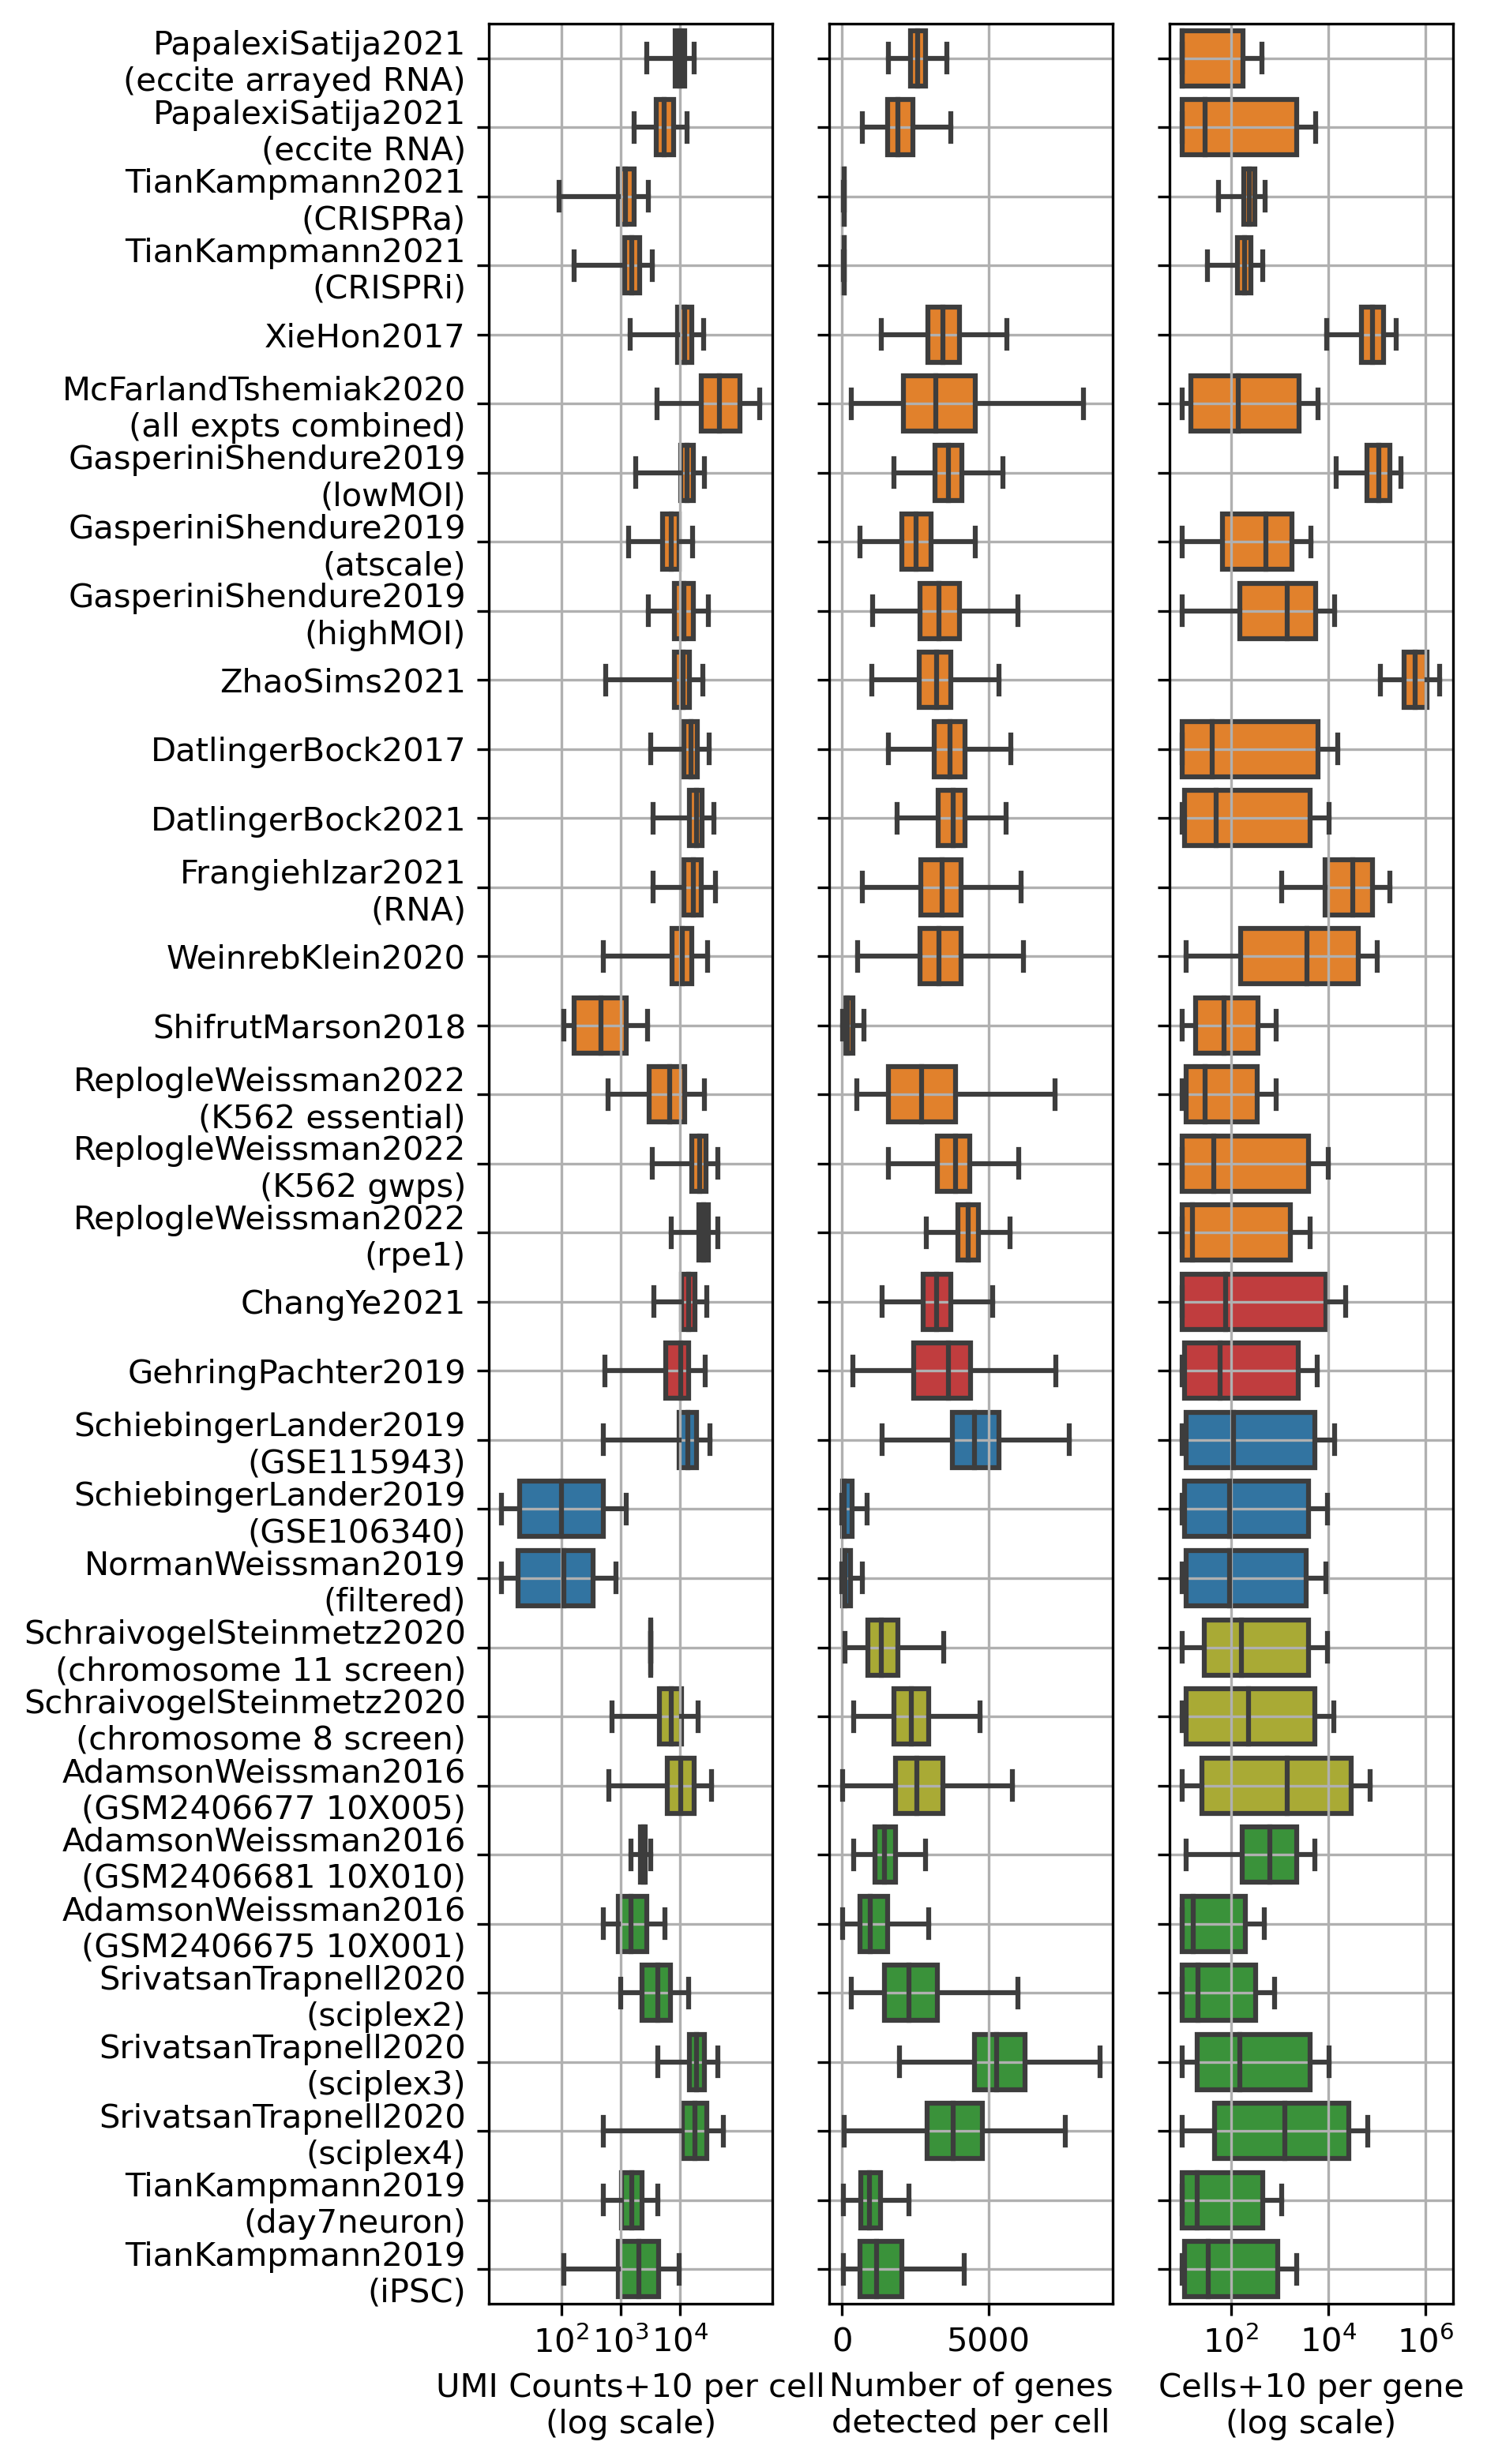

In [144]:
# options
pseudocounts = 10
kwargs = {'showfliers': False, 'hue': 'perturbation_type_', 'zorder': 5, 'palette': colors_perturbation_types, 'order': order, 'dodge': False}

# setup figure
# with sns.axes_style("whitegrid"):
scale = 0.75
fig, axs = pl.subplots(1, 3, figsize=[7*scale, 17*scale], sharey=True, dpi=300)

# First row ncounts (obs)
ax = axs[0]
df['ncounts'] += pseudocounts
bp = sns.boxplot(data=df, y='dataset', x='ncounts', ax=ax, **kwargs)
ax.set_xlabel(f'UMI Counts+{pseudocounts} per cell\n(log scale)')
ax.set_xscale('log')
ax.set_ylabel('')
bp.legend_.remove()
ax.grid()
ax.set_xticks([1e2, 1e3, 1e4])

# Second row ngenes
ax = axs[1]
bp = sns.boxplot(data=df, y='dataset', x='ngenes', ax=ax, **kwargs)
ax.set_xlabel('Number of genes\ndetected per cell')
# ax.set_title('Genes Expressed')
ax.set_ylabel('')
ax.grid()
bp.legend_.remove()

# Third row ncells
ax = axs[2]
df_['ncells'] += pseudocounts
bp = sns.boxplot(data=df_, y='dataset', x='ncells', ax=ax, **kwargs)
ax.set_xlabel(f'Cells+{pseudocounts} per gene\n(log scale)')
ax.set_xscale('log')
ax.set_ylabel('')
ax.grid()
ax.set_xticks([1e2, 1e4, 1e6])
bp.legend_.remove()
    
# xticks and labels
dataset_names = obses.keys()
dataset_names = [x.replace('TAP_SCREEN__', '') for x in dataset_names]
dataset_names = [x.replace('_', '\n(', 1)+')' if '_' in x else x for x in dataset_names]
dataset_names = [x.replace('_', ' ') for x in dataset_names]
axs[-1].set_yticks(np.arange(len(dataset_names)))
axs[-1].set_yticklabels(dataset_names, rotation=90)
pl.savefig(f'{figure_path}/Fig3A.pdf', bbox_inches='tight')
pl.show()

# Fig3C

In [145]:
keys = obses.keys()
keys = ['McFarlandTsherniak2020' if 'McFarland' in name else name for name in keys]  # typo
tab = pd.DataFrame(index=keys)
for name, obs in obses.items():
    name = 'McFarlandTsherniak2020' if 'McFarland' in name else name  # typo
    tab.loc[name, 'mean counts per cell'] = np.mean(obs.ncounts)
    tab.loc[name, 'mean genes expressed per cell'] = np.mean(obs.ngenes)
    tab.loc[name, 'number of perturbations'] = len(pd.unique(obs.perturbation))
    tab.loc[name, 'number of perturbations (log)'] = np.log(len(pd.unique(obs.perturbation)))
    tab.loc[name, 'number of cells'] = len(obs)
    tab.loc[name, 'mean number of cells per perturbation'] = np.mean(obs.value_counts('perturbation'))
    tab.loc[name, 'modality'] = 'protein' if 'protein' in name else 'RNA'
    tab.loc[name, 'year'] = int(name.split('_')[0][-4:])
    tab.loc[name, 'Date of Submission'] = pd.to_datetime(metadata.loc[name, 'Date of Submission'])
    tab.loc[name, 'perturbation type'] = metadata.loc[name, 'Perturbation'].replace(', TCR stim', '')
    for cat_key in ['tissue_type', 'cancer', 'organism']:
        tab.loc[name, cat_key] = pd.unique(obs[cat_key])[0] if cat_key in obs.keys() else None
    tab.loc[name, 'dataset'] = name

In [146]:
tab

,mean counts per cell,mean genes expressed per cell,number of perturbations,number of perturbations (log),number of cells,mean number of cells per perturbation,modality,year,Date of Submission,perturbation type,tissue_type,cancer,organism,dataset
PapalexiSatija2021_eccite_arrayed_RNA,7767.093500,2554.936776,11.0,2.397895,8984.0,816.727273,RNA,2021.0,2021-03-01,CRISPR-cas9,cell_line,True,human,PapalexiSatija2021_eccite_arrayed_RNA
PapalexiSatija2021_eccite_RNA,13259.987119,3354.192146,99.0,4.595120,20729.0,209.383838,RNA,2021.0,2021-03-01,CRISPR-cas9,cell_line,True,human,PapalexiSatija2021_eccite_RNA
TianKampmann2021_CRISPRa,10910.682584,3476.868022,101.0,4.615121,21193.0,209.831683,RNA,2021.0,2020-07-01,CRISPRa,primary,False,human,TianKampmann2021_CRISPRa
TianKampmann2021_CRISPRi,14820.948266,4431.089443,185.0,5.220356,32300.0,174.594595,RNA,2021.0,2020-07-01,CRISPRi,primary,False,human,TianKampmann2021_CRISPRi
XieHon2017,88739.620492,3442.310096,3385.0,8.127109,13283.0,3.924077,RNA,2017.0,2016-03-01,CRISPR-cas9,cell_line,True,human,XieHon2017
McFarlandTsherniak2020,22159.952612,3889.984093,18.0,2.890372,182875.0,10159.722222,RNA,2020.0,2019-12-01,drugs,cell_line,True,human,McFarlandTsherniak2020
GasperiniShendure2019_lowMOI,22108.307698,3755.207175,16532.0,9.713053,41284.0,2.226786,RNA,2019.0,2018-06-01,CRISPR-cas9,cell_line,True,human,GasperiniShendure2019_lowMOI
GasperiniShendure2019_atscale,18171.176834,3371.526268,203496.0,12.223402,207324.0,1.011312,RNA,2019.0,2018-06-01,CRISPR-cas9,cell_line,True,human,GasperiniShendure2019_atscale
GasperiniShendure2019_highMOI,19305.300147,3675.874334,39088.0,10.573571,47650.0,1.211426,RNA,2019.0,2018-06-01,CRISPR-cas9,cell_line,True,human,GasperiniShendure2019_highMOI
ZhaoSims2021,3358.898068,1473.238139,7.0,1.945910,165748.0,23678.285714,RNA,2021.0,2020-04-01,drugs,primary,True,human,ZhaoSims2021


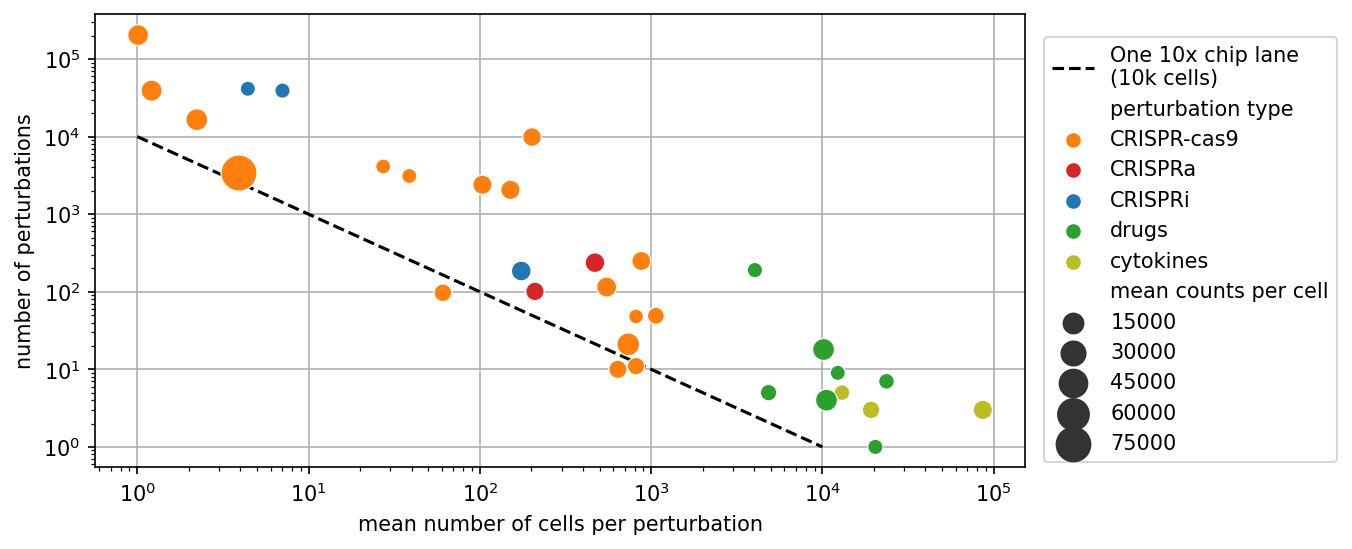

In [149]:
fig, ax = pl.subplots(figsize=[8,4], dpi=150)
sns.scatterplot(data=tab, x='mean number of cells per perturbation', y='number of perturbations', palette=colors_perturbation_types,
                hue='perturbation type', size='mean counts per cell', sizes=(50,300), zorder=3)
ax.plot([1, 1e4], [1e4, 1], 'k--', label='One 10x chip lane\n(10k cells)')
pl.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0)
pl.xscale('log')
pl.yscale('log')
ax.grid(which='major', zorder=-1)
# pl.title('Trade-off between number of perturbations and\nmean cells per perturbation')
pl.savefig(f'{figure_path}/Fig3C.pdf', bbox_inches='tight')
pl.show()

# Supplement

## SuppFig3C

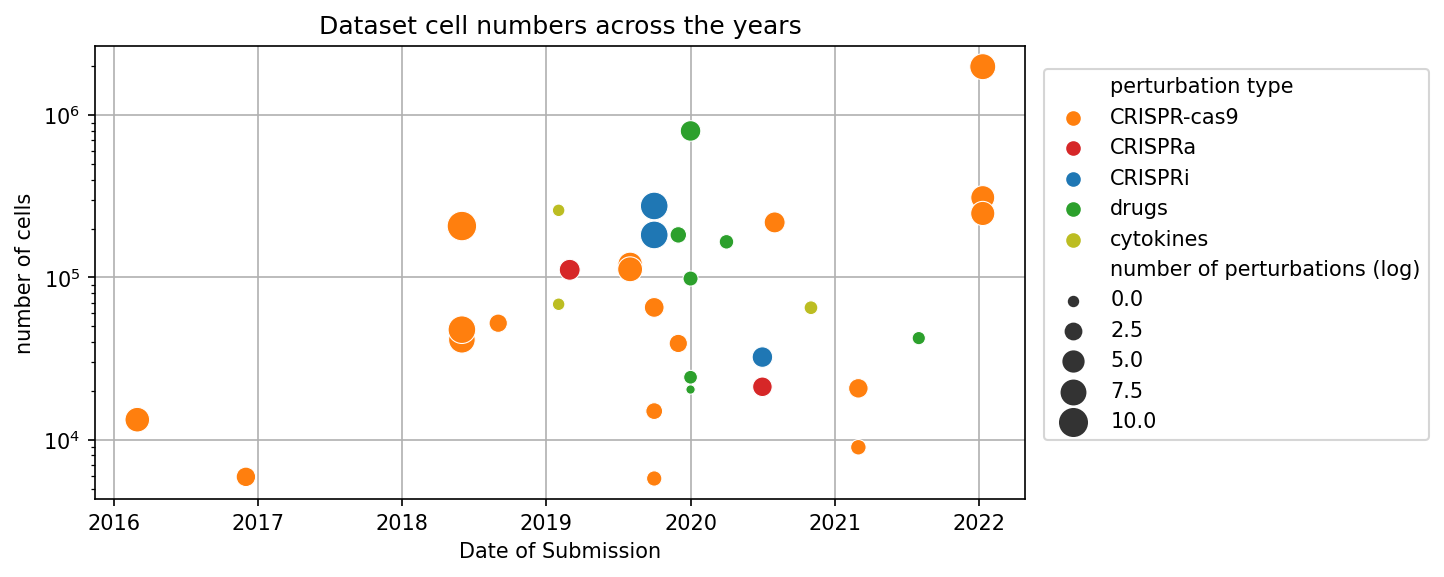

In [150]:
fig, ax = pl.subplots(figsize=[8,4], dpi=150)
sns.scatterplot(data=tab, x='Date of Submission', y='number of cells', hue='perturbation type', size='number of perturbations (log)', 
                sizes=(20,200), ax=ax, zorder=3, palette=colors_perturbation_types,)
pl.yscale('log')
ax.grid(which='major', zorder=-1)
pl.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0)
pl.title('Dataset cell numbers across the years')
pl.savefig(f'{supp_path}SuppFig3C.pdf', bbox_inches='tight')
pl.show()